In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\furka\JupyterNotebookProjects\Fund_Stat\Fund-Stats\tefas_funds_data.csv")

In [3]:
df

,date,code,title,price,market_cap,number_of_investors,number_of_shares
0,2019-09-23,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.175174,8.308115e+06,298.0,7.069690e+06
1,2019-09-24,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.193278,8.495458e+06,295.0,7.119429e+06
2,2019-09-25,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.185895,8.384649e+06,288.0,7.070313e+06
3,2019-09-26,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.194965,8.071311e+06,287.0,6.754434e+06
4,2019-09-27,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.181067,7.889600e+06,285.0,6.680062e+06
...,...,...,...,...,...,...,...
4708,2024-09-02,KLU,KUVEYT TÜRK PORTFÖY PARA PİYASASI KATILIM (TL)...,2.282647,4.102847e+10,56230.0,1.797407e+10
4709,2024-09-02,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.045513,2.587774e+09,34374.0,4.280487e+08
4710,2024-09-02,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.486352,7.326663e+08,21153.0,4.929293e+08
4711,2024-09-02,KUT,KUVEYT TÜRK PORTFÖY KIYMETLİ MADENLER KATILIM ...,4.613837,1.118915e+09,13860.0,2.425128e+08


In [4]:
print(df.isnull().sum())

date                   0
code                   0
title                  0
price                  0
market_cap             0
number_of_investors    0
number_of_shares       0
dtype: int64


In [5]:
fund_codes = ["KPC", "HKH", "KLU", "KZL", "CPU", "KUT"]

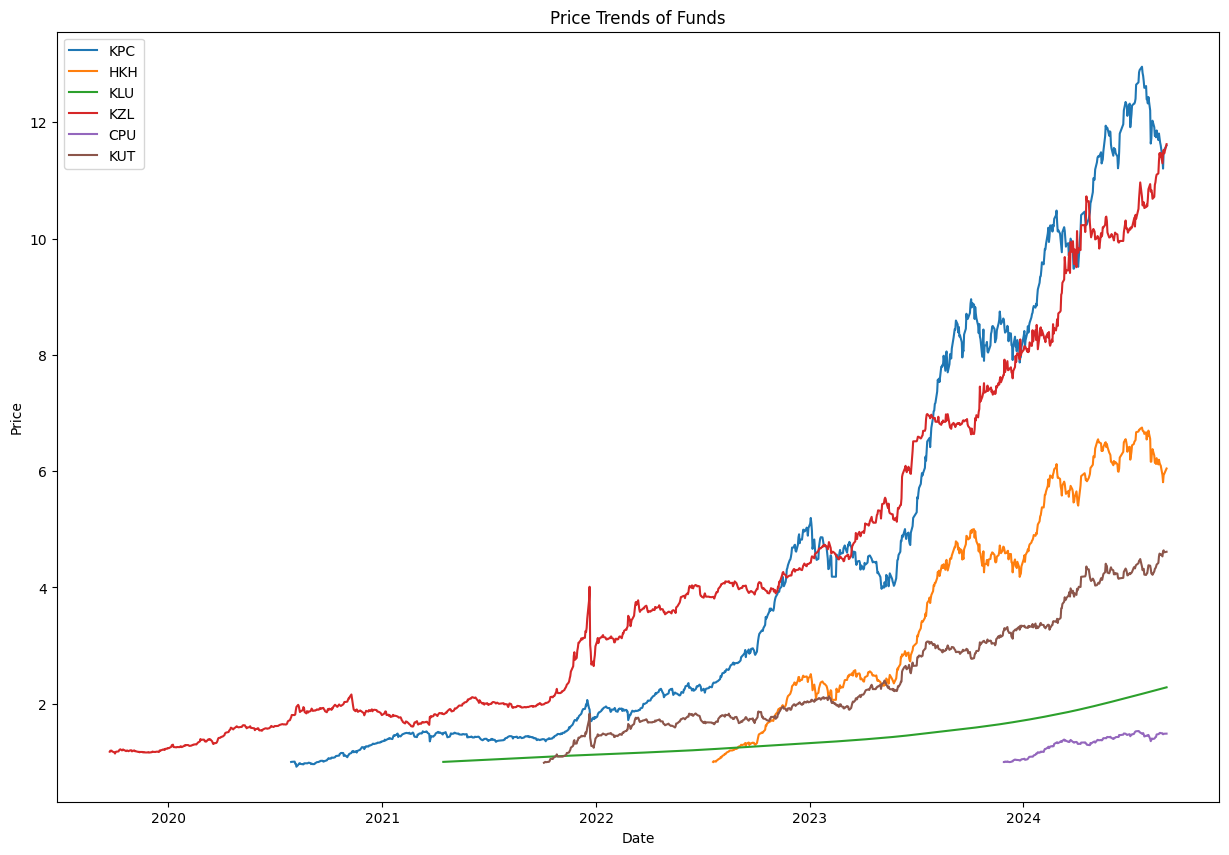

In [6]:
# # Date kolonunu datetime formatına çevir
df['date'] = pd.to_datetime(df['date'])

# Grafiği çiz
plt.figure(figsize=(15, 10))
for fund in fund_codes:
    fund_data = df[df['code'] == fund]
    plt.plot(fund_data['date'], fund_data['price'], label=fund)
plt.legend()
plt.title('Price Trends of Funds')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

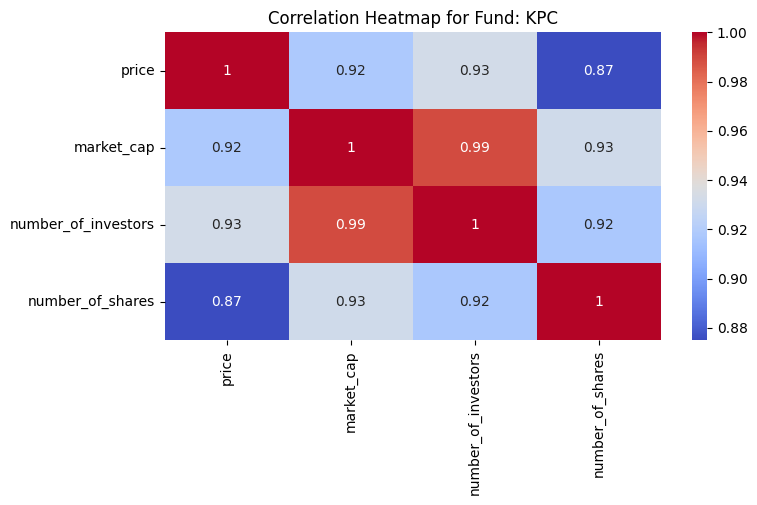

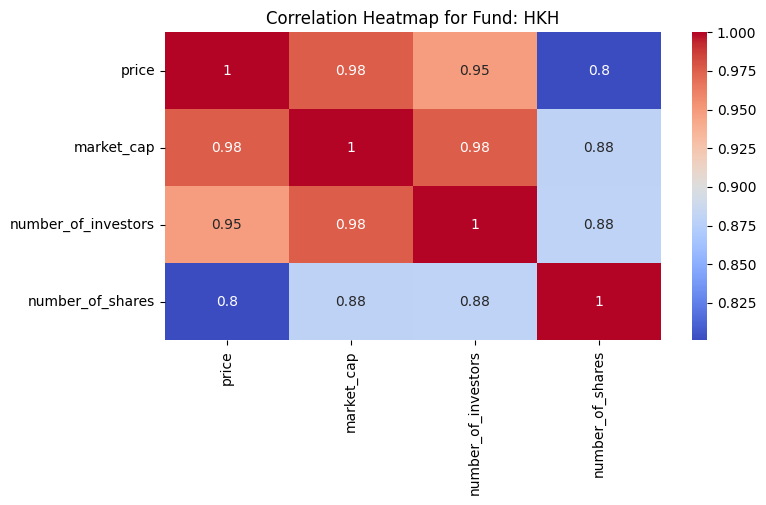

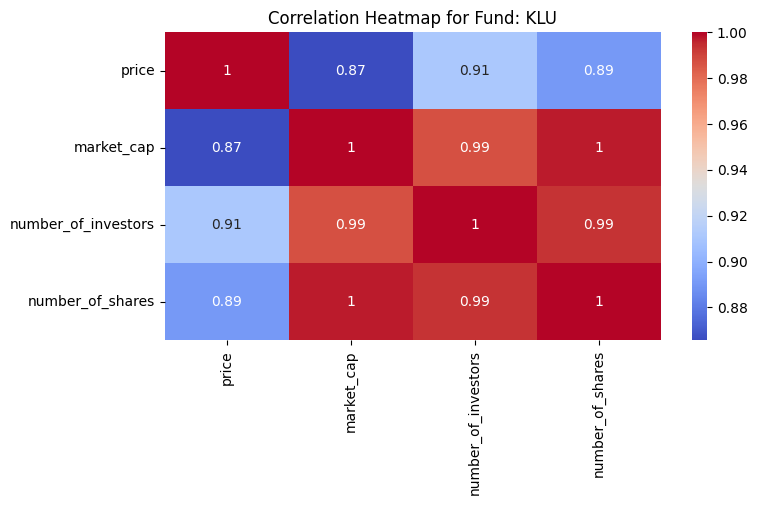

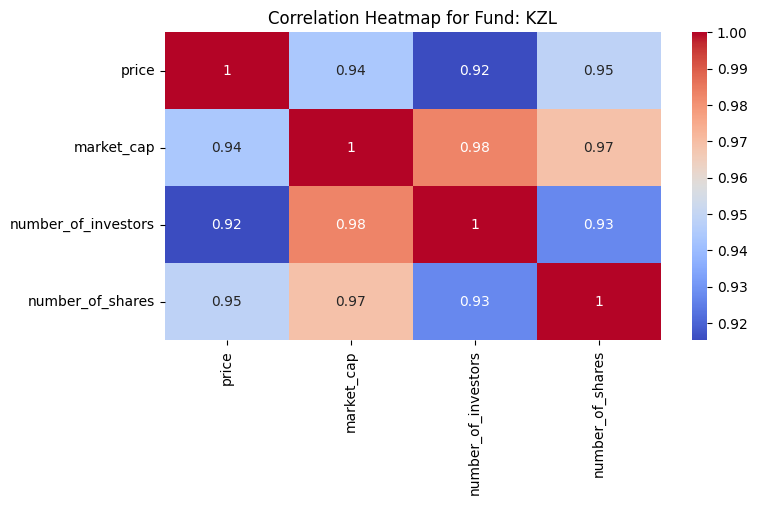

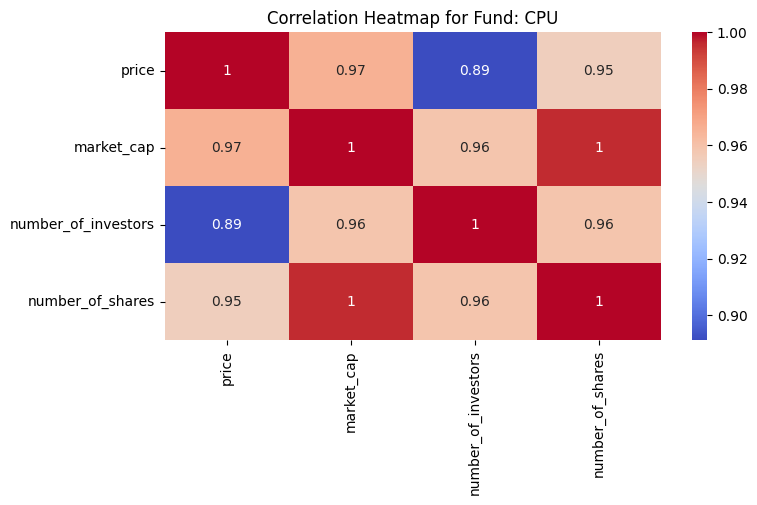

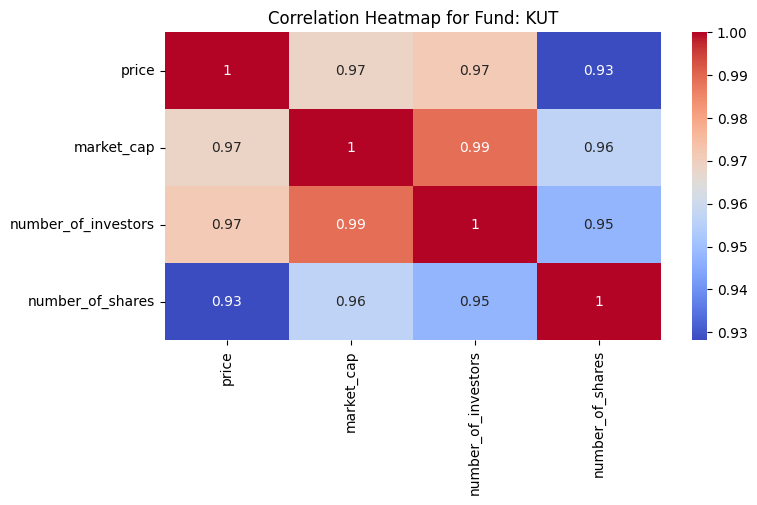

In [7]:
# Korelasyon matrisi görselleştirme
for fund in fund_codes:
    plt.figure(figsize=(8, 4))
    fund_data = df[df['code'] == fund]
    correlation_matrix = fund_data[['price', 'market_cap', 'number_of_investors', 'number_of_shares']].corr()

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for Fund: {fund}')
    plt.show()


In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek + 1  # Pazartesi 1 olacak şekilde

In [9]:
df

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week
0,2019-09-23,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.175174,8.308115e+06,298.0,7.069690e+06,2019,9,1
1,2019-09-24,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.193278,8.495458e+06,295.0,7.119429e+06,2019,9,2
2,2019-09-25,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.185895,8.384649e+06,288.0,7.070313e+06,2019,9,3
3,2019-09-26,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.194965,8.071311e+06,287.0,6.754434e+06,2019,9,4
4,2019-09-27,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.181067,7.889600e+06,285.0,6.680062e+06,2019,9,5
...,...,...,...,...,...,...,...,...,...,...
4708,2024-09-02,KLU,KUVEYT TÜRK PORTFÖY PARA PİYASASI KATILIM (TL)...,2.282647,4.102847e+10,56230.0,1.797407e+10,2024,9,1
4709,2024-09-02,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.045513,2.587774e+09,34374.0,4.280487e+08,2024,9,1
4710,2024-09-02,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.486352,7.326663e+08,21153.0,4.929293e+08,2024,9,1
4711,2024-09-02,KUT,KUVEYT TÜRK PORTFÖY KIYMETLİ MADENLER KATILIM ...,4.613837,1.118915e+09,13860.0,2.425128e+08,2024,9,1


In [10]:
# Günlük getiriyi hesapla
df['daily_return'] = df.groupby('code')['price'].pct_change()

In [11]:
df

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,daily_return
0,2019-09-23,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.175174,8.308115e+06,298.0,7.069690e+06,2019,9,1,NaN
1,2019-09-24,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.193278,8.495458e+06,295.0,7.119429e+06,2019,9,2,0.015405
2,2019-09-25,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.185895,8.384649e+06,288.0,7.070313e+06,2019,9,3,-0.006187
3,2019-09-26,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.194965,8.071311e+06,287.0,6.754434e+06,2019,9,4,0.007648
4,2019-09-27,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.181067,7.889600e+06,285.0,6.680062e+06,2019,9,5,-0.011630
...,...,...,...,...,...,...,...,...,...,...,...
4708,2024-09-02,KLU,KUVEYT TÜRK PORTFÖY PARA PİYASASI KATILIM (TL)...,2.282647,4.102847e+10,56230.0,1.797407e+10,2024,9,1,0.004745
4709,2024-09-02,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.045513,2.587774e+09,34374.0,4.280487e+08,2024,9,1,0.015457
4710,2024-09-02,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.486352,7.326663e+08,21153.0,4.929293e+08,2024,9,1,0.000918
4711,2024-09-02,KUT,KUVEYT TÜRK PORTFÖY KIYMETLİ MADENLER KATILIM ...,4.613837,1.118915e+09,13860.0,2.425128e+08,2024,9,1,0.002155


Price ile ema 20 ema 50 ema 100 ve ema 200'ü aynı grafikte bastır.

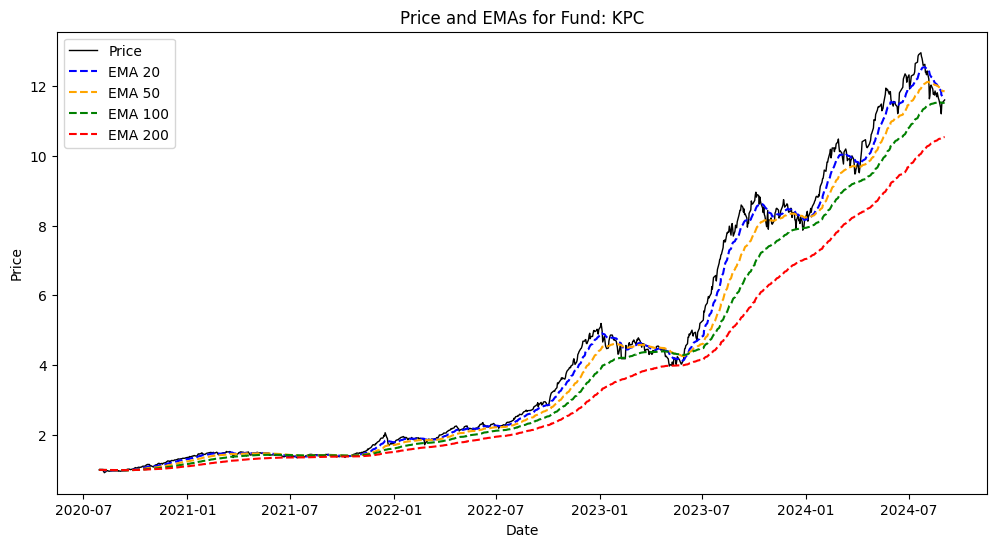

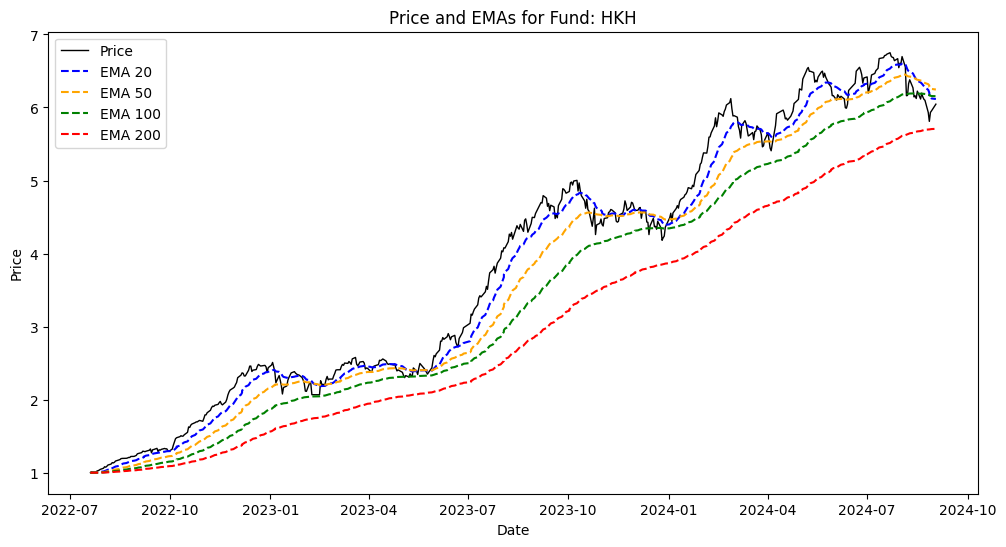

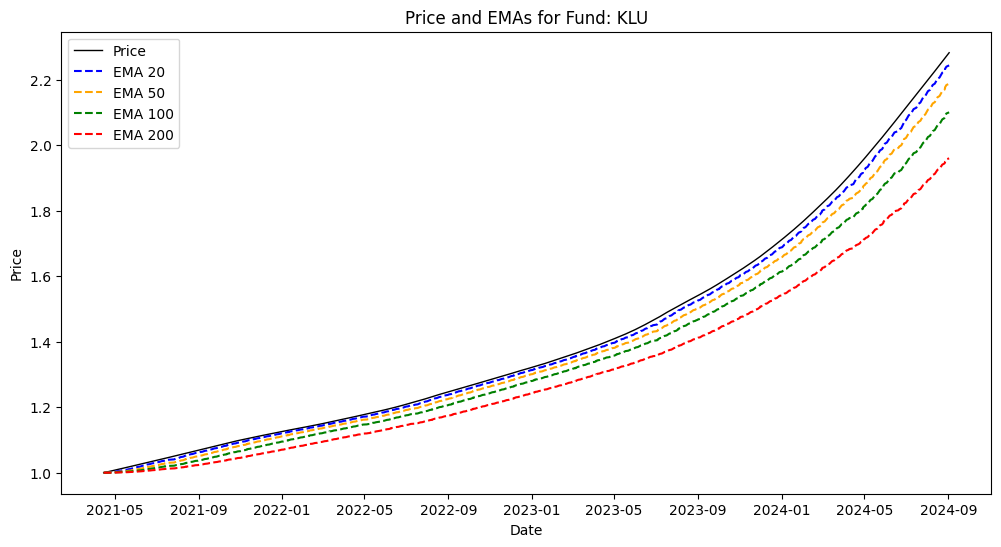

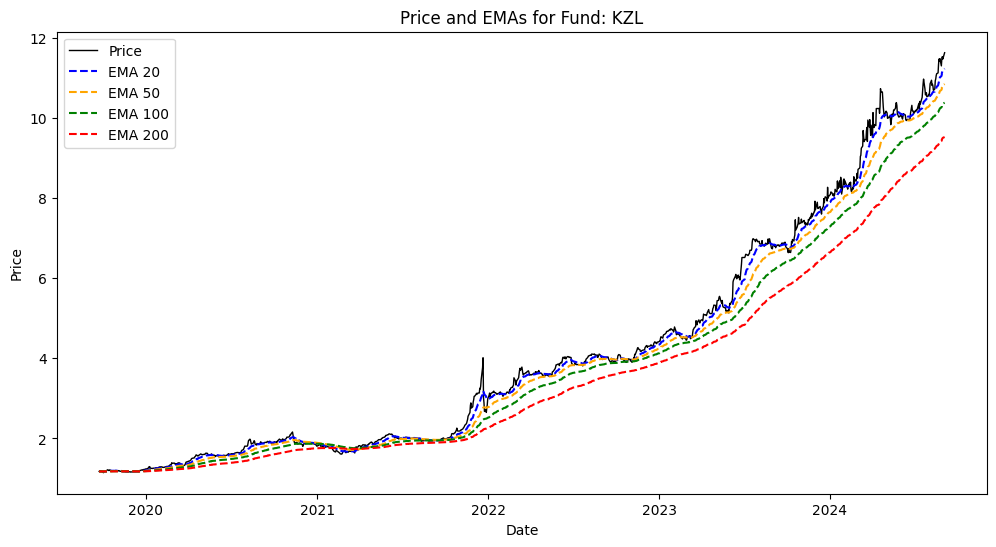

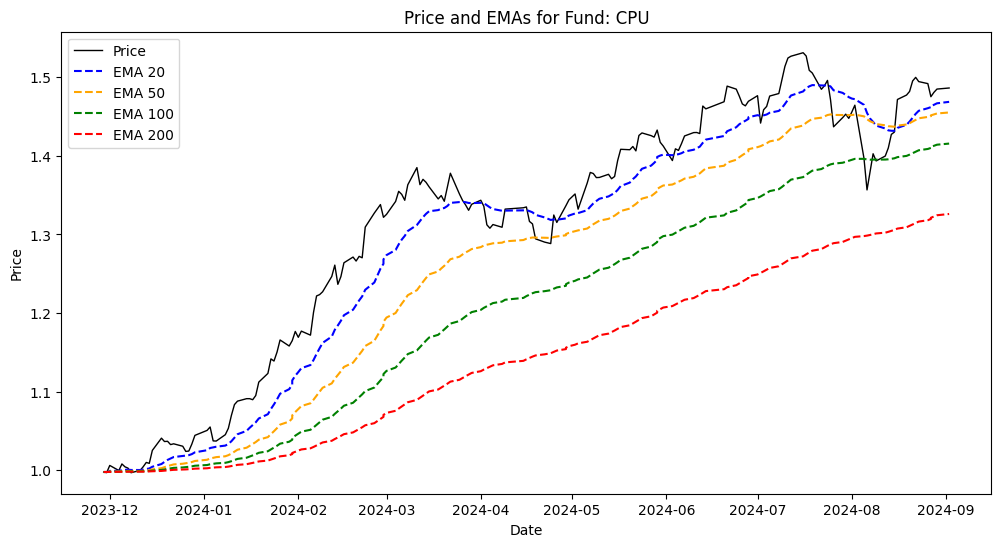

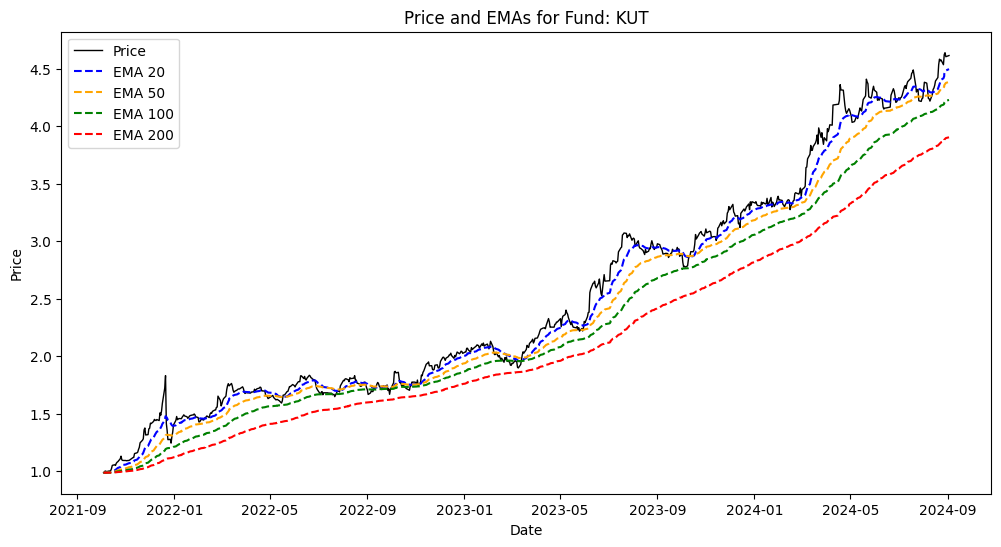

In [13]:
for fund in fund_codes:
    # İlgili fonun verilerini filtrele
    fund_data = df[df['code'] == fund].copy()

    # EMA hesaplamaları
    fund_data['EMA20'] = fund_data['price'].ewm(span=20, adjust=False).mean()
    fund_data['EMA50'] = fund_data['price'].ewm(span=50, adjust=False).mean()
    fund_data['EMA100'] = fund_data['price'].ewm(span=100, adjust=False).mean()
    fund_data['EMA200'] = fund_data['price'].ewm(span=200, adjust=False).mean()

    # Grafiği oluştur
    plt.figure(figsize=(12, 6))
    plt.plot(fund_data['date'], fund_data['price'], label='Price', color='black', linewidth=1)
    plt.plot(fund_data['date'], fund_data['EMA20'], label='EMA 20', color='blue', linestyle='--')
    plt.plot(fund_data['date'], fund_data['EMA50'], label='EMA 50', color='orange', linestyle='--')
    plt.plot(fund_data['date'], fund_data['EMA100'], label='EMA 100', color='green', linestyle='--')
    plt.plot(fund_data['date'], fund_data['EMA200'], label='EMA 200', color='red', linestyle='--')

    # Grafik başlıkları ve gösterge
    plt.title(f'Price and EMAs for Fund: {fund}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


Correlation Matrix:
          KPC       HKH       KLU       KZL       CPU       KUT
KPC  1.000000  0.961683  0.921398  0.849042  0.938867  0.872375
HKH  0.961683  1.000000  0.830211  0.809827  0.937566  0.817847
KLU  0.921398  0.830211  1.000000  0.935431  0.895532  0.928325
KZL  0.849042  0.809827  0.935431  1.000000  0.886307  0.981274
CPU  0.938867  0.937566  0.895532  0.886307  1.000000  0.888994
KUT  0.872375  0.817847  0.928325  0.981274  0.888994  1.000000


C:\Users\furka\AppData\Local\Temp\ipykernel_3324\3155305498.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fund_prices = fund_prices.fillna(method='ffill').fillna(method='bfill')


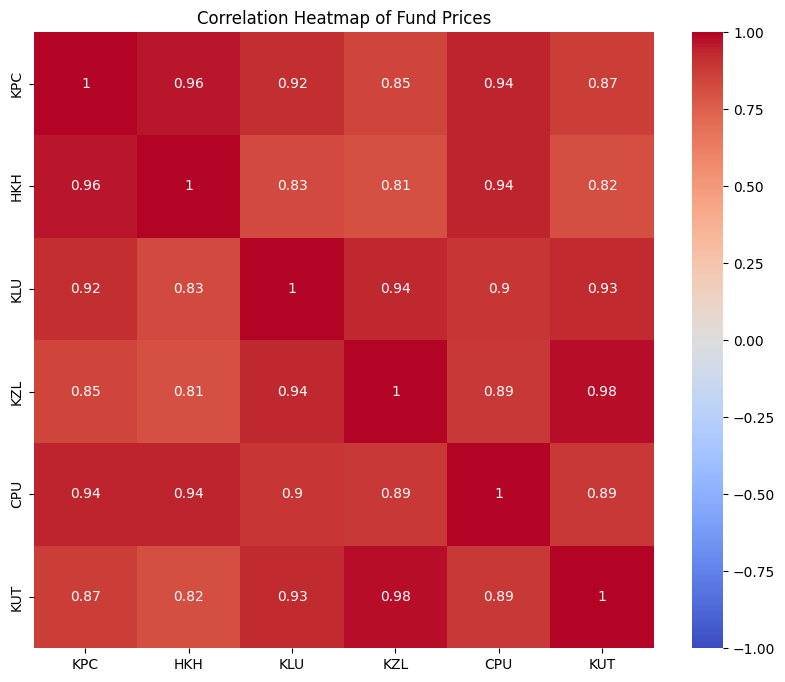

In [16]:
# Import required libraries (assuming they're already imported in the original code)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the common date range for all funds
start_dates = df.groupby('code')['date'].min()
end_dates = df.groupby('code')['date'].max()

common_start = start_dates.max()
common_end = end_dates.min()

common_dates = pd.date_range(start=common_start, end=common_end, freq='D')

# Convert fund prices to a DataFrame and reindex to the common date range
fund_prices = pd.DataFrame(index=common_dates)

for fund in fund_codes:
    fund_data = df[df['code'] == fund].copy()
    
    # Convert the price column to float
    fund_data['price'] = pd.to_numeric(fund_data['price'], errors='coerce')
    
    # Remove duplicate dates by taking the average price
    fund_data = fund_data.groupby('date')['price'].mean()
    
    # Resample according to common dates
    fund_data = fund_data.reindex(common_dates)
    
    fund_prices[fund] = fund_data

# Fill NaN values appropriately
fund_prices = fund_prices.fillna(method='ffill').fillna(method='bfill')

# Compute the correlation matrix
correlation_matrix = fund_prices.corr()

# Print the correlation matrix numerically
print("Correlation Matrix:")
print(correlation_matrix)

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Fund Prices')
plt.show()

In [17]:
fund_prices

,KPC,HKH,KLU,KZL,CPU,KUT
2023-11-29,8.600648,4.691919,1.657799,7.653585,0.997679,3.256020
2023-11-30,8.466929,4.645007,1.659394,7.917876,0.996986,3.300241
2023-12-01,8.382948,4.587325,1.660948,7.703213,1.006015,3.272593
2023-12-02,8.382948,4.587325,1.660948,7.703213,1.006015,3.272593
2023-12-03,8.382948,4.587325,1.660948,7.703213,1.006015,3.272593
...,...,...,...,...,...,...
2024-08-29,11.523798,5.953492,2.271868,11.463023,1.484989,4.603914
2024-08-30,11.523798,5.953492,2.271868,11.463023,1.484989,4.603914
2024-08-31,11.523798,5.953492,2.271868,11.463023,1.484989,4.603914
2024-09-01,11.523798,5.953492,2.271868,11.463023,1.484989,4.603914


In [21]:
import pandas as pd
import numpy as np

def calculate_rsi(series, period=14):
    delta = series.diff()

    # Separate gains and losses
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    # Calculate average gains and losses
    avg_gains = gains.rolling(window=period, min_periods=1).mean()
    avg_losses = losses.rolling(window=period, min_periods=1).mean()

    # Calculate RS and RSI
    rs = avg_gains / avg_losses
    rsi = 100 - (100 / (1 + rs))

    # Handle division by zero
    rsi = rsi.replace([np.inf, -np.inf], np.nan)

    # First RSI value should start after the initial period
    rsi[:period] = np.nan

    return rsi

# Apply RSI calculation to each fund
df['RSI'] = df.groupby('code')['price'].transform(lambda x: calculate_rsi(x))

In [22]:
df

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,daily_return,RSI
0,2019-09-23,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.175174,8.308115e+06,298.0,7.069690e+06,2019,9,1,NaN,NaN
1,2019-09-24,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.193278,8.495458e+06,295.0,7.119429e+06,2019,9,2,0.015405,NaN
2,2019-09-25,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.185895,8.384649e+06,288.0,7.070313e+06,2019,9,3,-0.006187,NaN
3,2019-09-26,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.194965,8.071311e+06,287.0,6.754434e+06,2019,9,4,0.007648,NaN
4,2019-09-27,KZL,KUVEYT TÜRK ASSET MANAGEMENT GOLD PARTICIPATIO...,1.181067,7.889600e+06,285.0,6.680062e+06,2019,9,5,-0.011630,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4708,2024-09-02,KLU,KUVEYT TÜRK PORTFÖY PARA PİYASASI KATILIM (TL)...,2.282647,4.102847e+10,56230.0,1.797407e+10,2024,9,1,0.004745,100.000000
4709,2024-09-02,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,6.045513,2.587774e+09,34374.0,4.280487e+08,2024,9,1,0.015457,44.869462
4710,2024-09-02,CPU,AKTİF PORTFÖY TEKNOLOJİ KATILIM FONU,1.486352,7.326663e+08,21153.0,4.929293e+08,2024,9,1,0.000918,80.398139
4711,2024-09-02,KUT,KUVEYT TÜRK PORTFÖY KIYMETLİ MADENLER KATILIM ...,4.613837,1.118915e+09,13860.0,2.425128e+08,2024,9,1,0.002155,81.026071


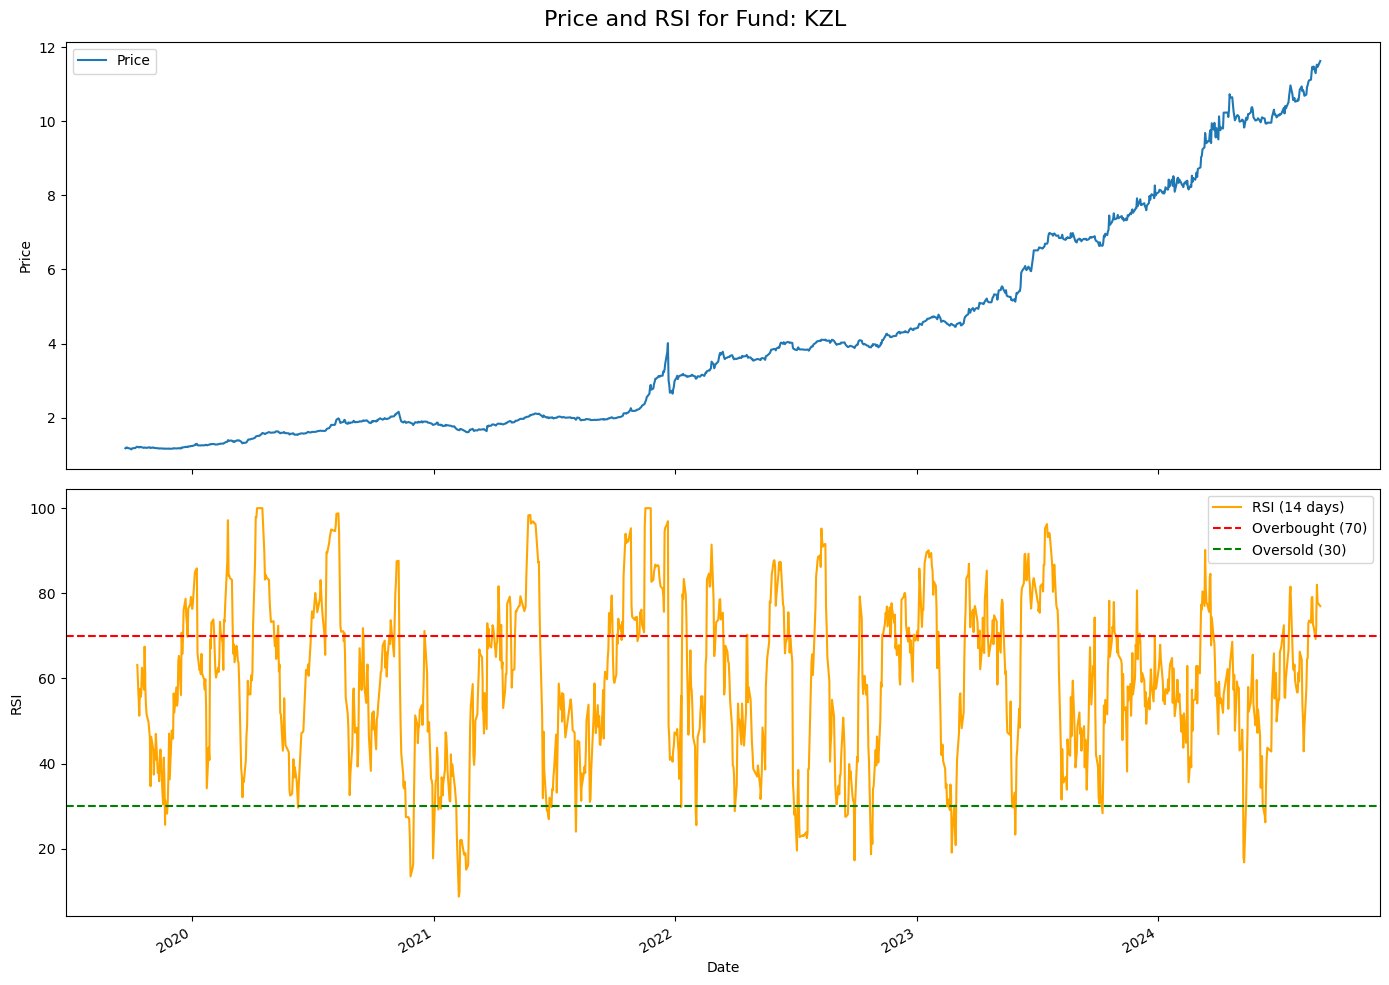

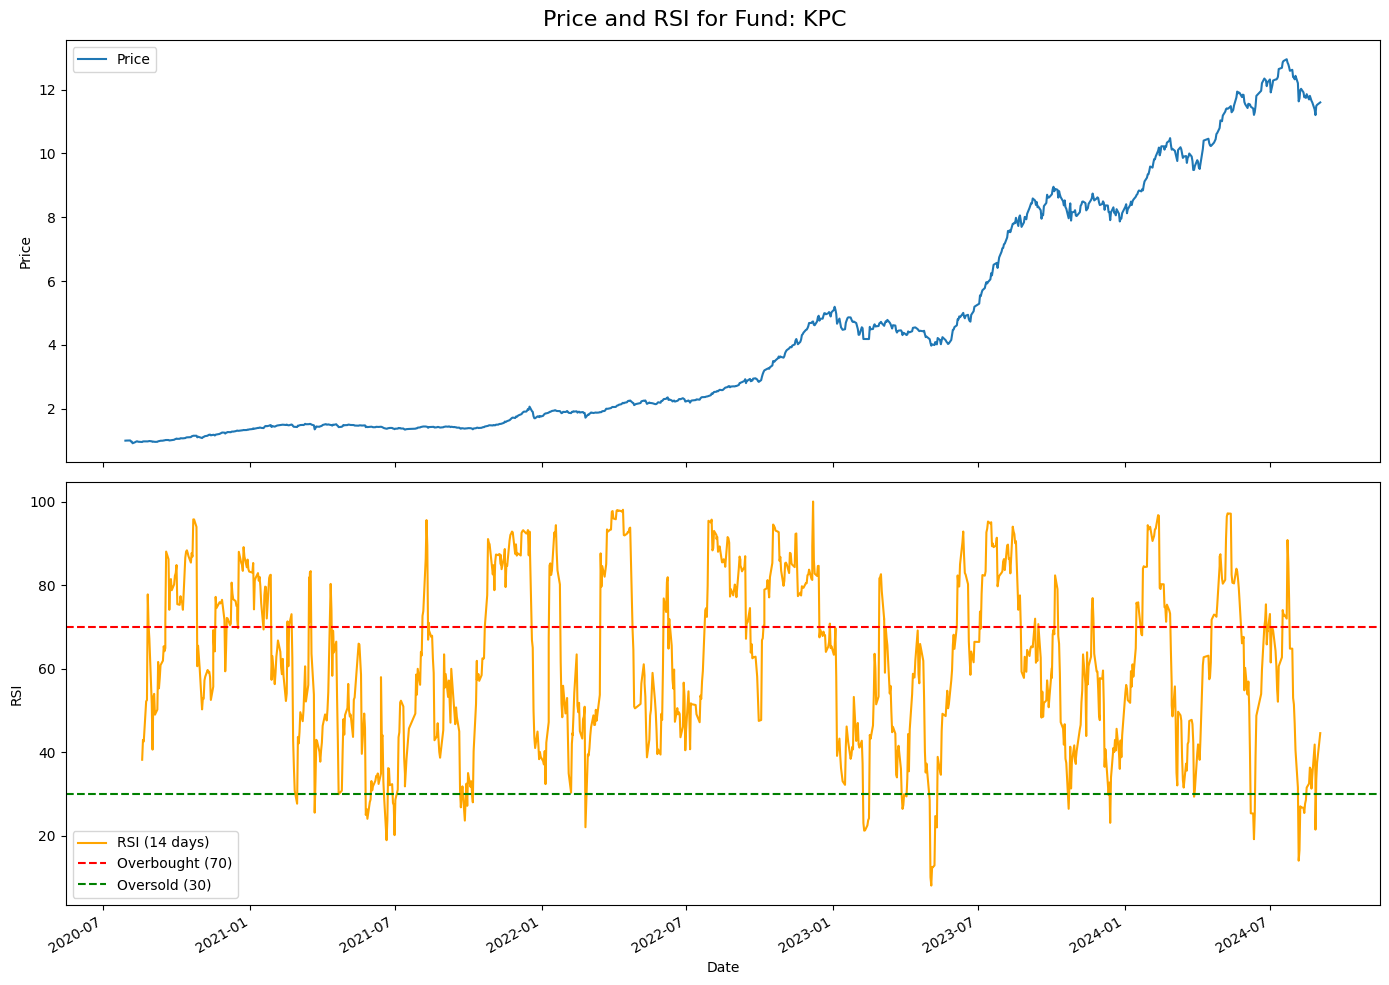

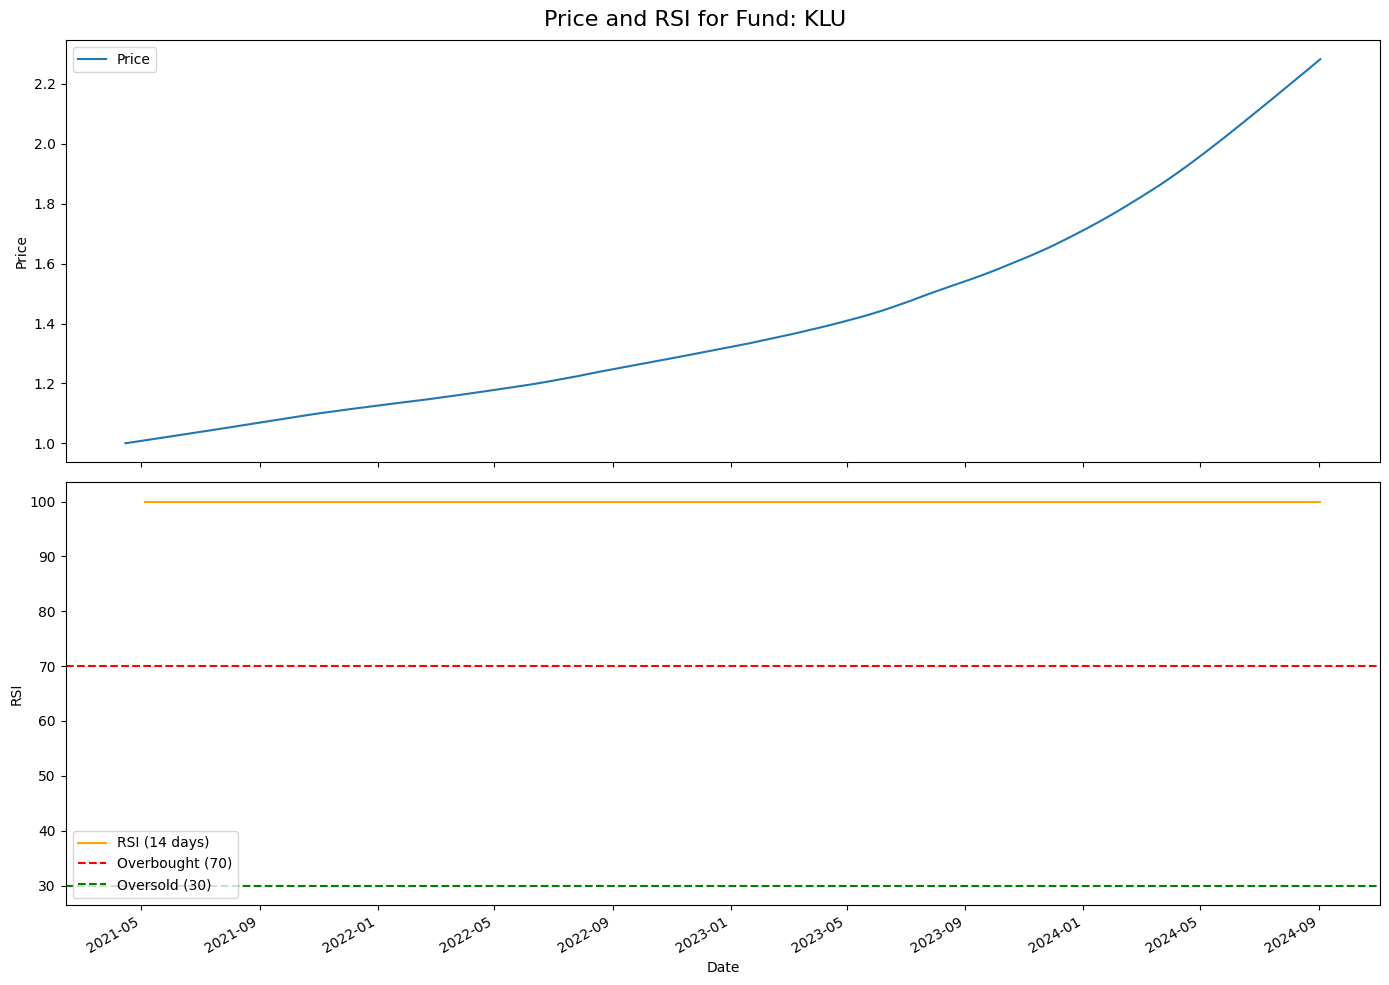

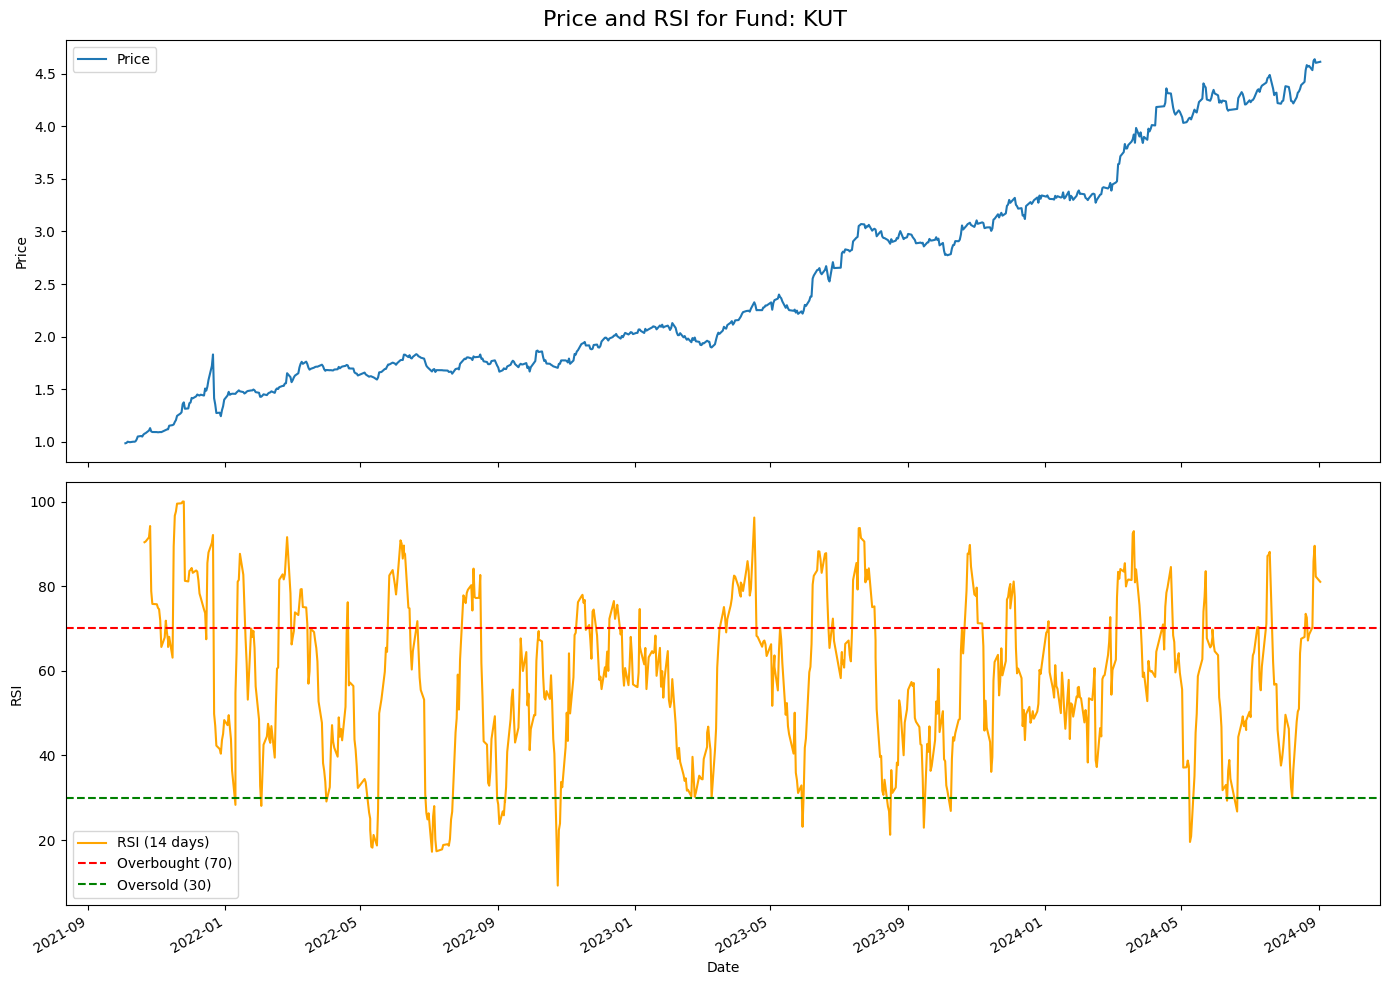

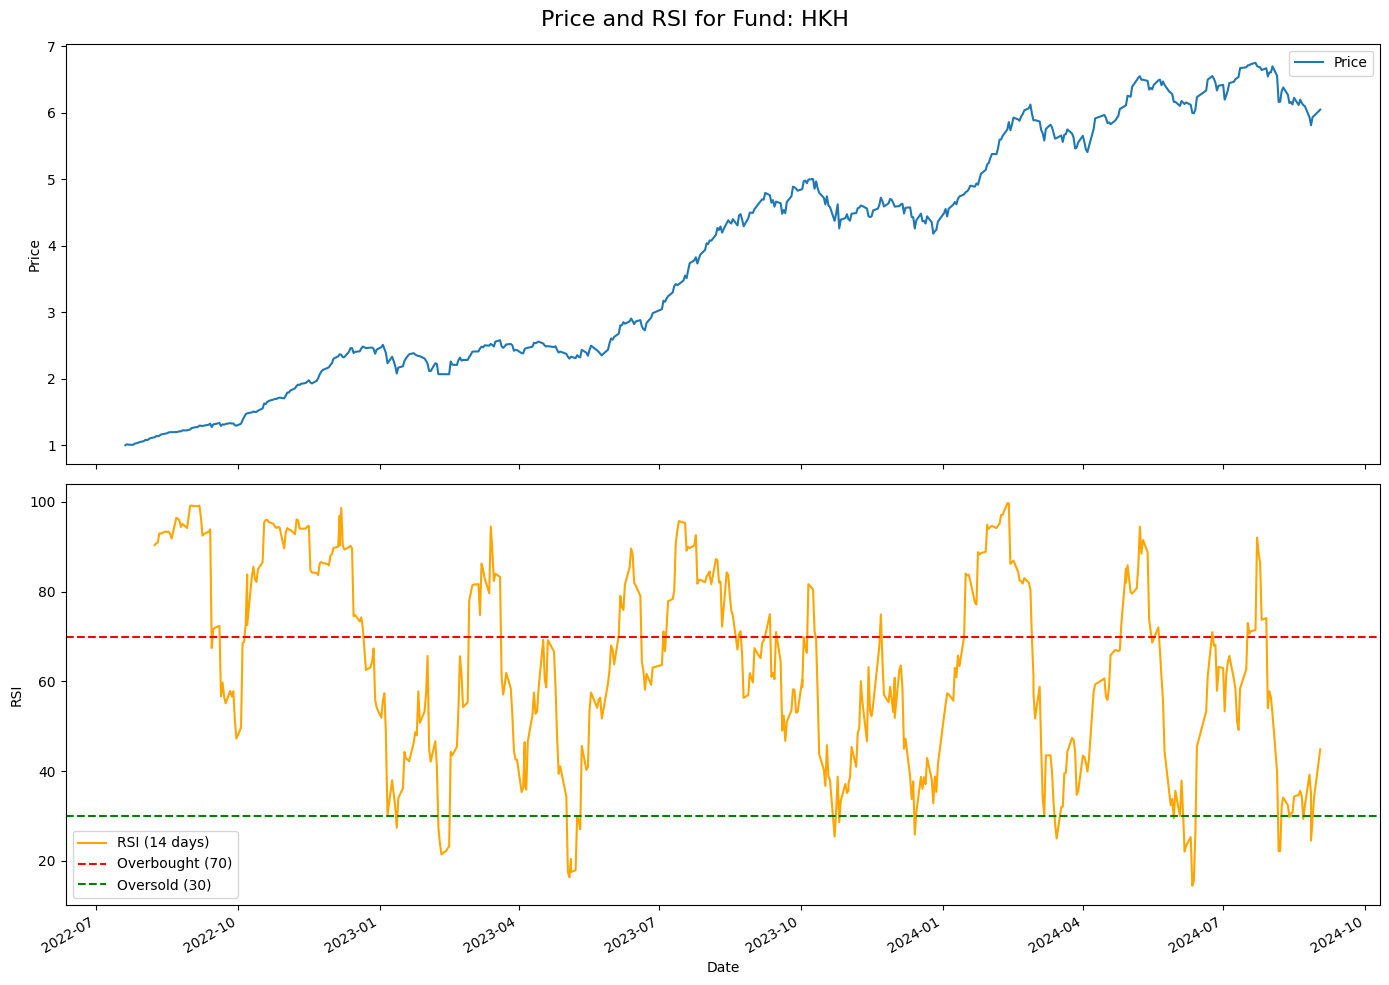

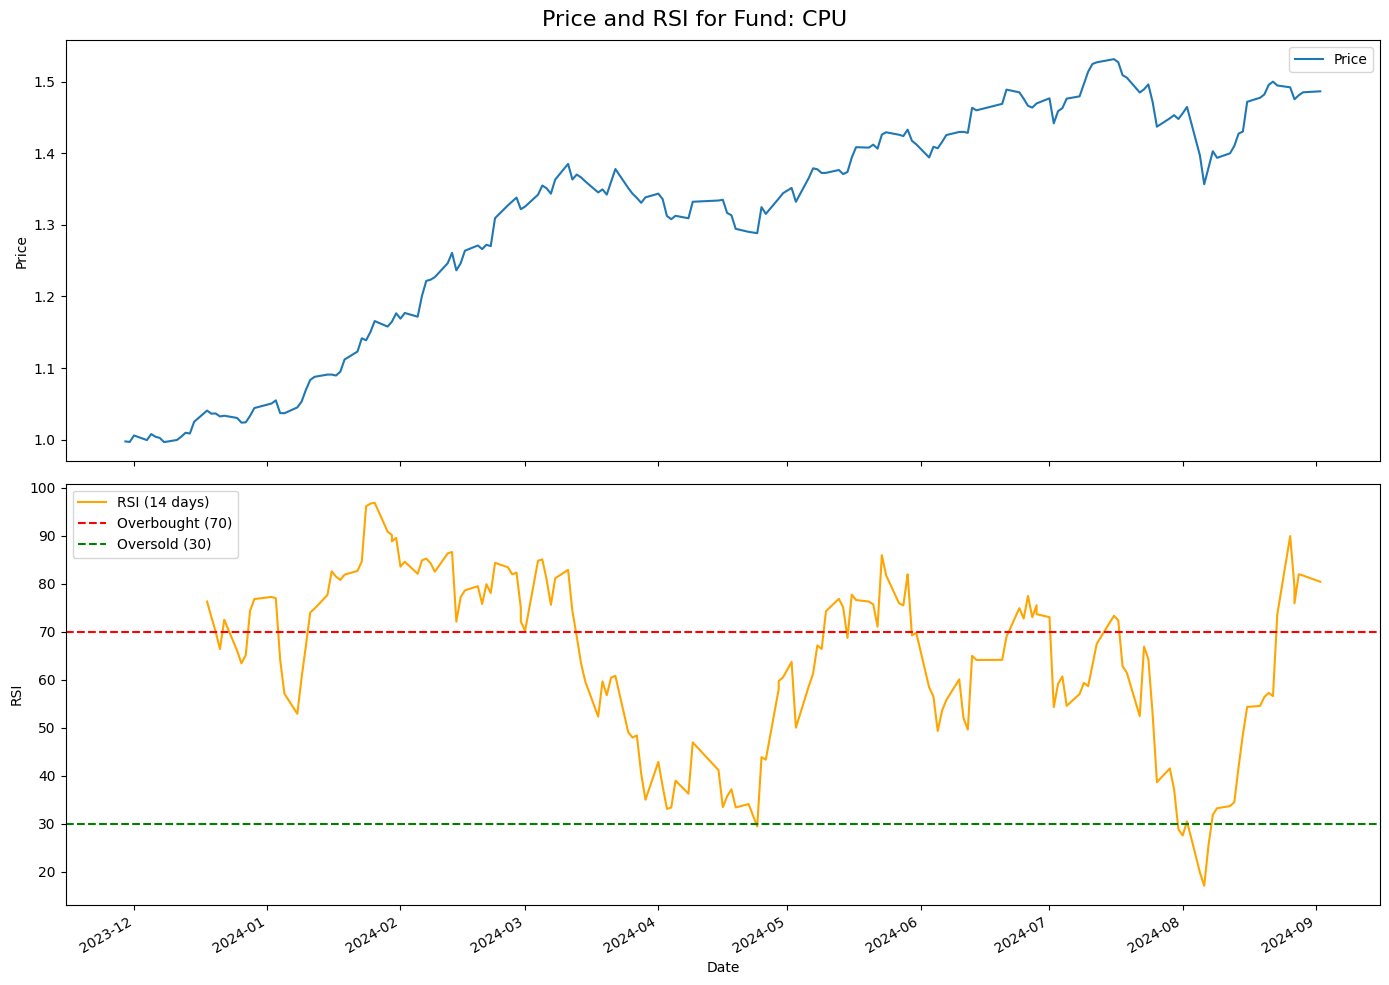

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_rsi_for_each_fund(df, period=14):
    # Get unique fund codes
    fund_codes = df['code'].unique()
    
    for fund in fund_codes:
        # Filter data for the current fund
        fund_data = df[df['code'] == fund]
        
        # Sort data by date
        fund_data = fund_data.sort_values('date')
        
        # Create the plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
        fig.suptitle(f'Price and RSI for Fund: {fund}', fontsize=16)
        
        # Price plot
        ax1.plot(fund_data['date'], fund_data['price'], label='Price')
        ax1.set_ylabel('Price')
        ax1.legend()
        
        # RSI plot
        ax2.plot(fund_data['date'], fund_data['RSI'], label=f'RSI ({period} days)', color='orange')
        ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
        ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
        ax2.set_ylabel('RSI')
        ax2.set_xlabel('Date')
        ax2.legend()
        
        # Set the x-axis to display dates nicely
        plt.gcf().autofmt_xdate()
        
        plt.tight_layout()
        plt.show()

# Assuming df is your DataFrame with 'code', 'date', 'price', and 'RSI' columns
plot_rsi_for_each_fund(df)

# Alış ve Satış Valörleri
    KPC: Alış: 1, Satış: 2
    HKH: Alış: 1, Satış: 2
    KZL: Alış: 1, Satış: 1
    KUT: Alış: 1, Satış: 1
    CPU: Alış: 1, Satış: 3

### Bu kısımda hata var eğer 1 defa buy verdiyse satana kadar bir daha buy sinyali vermemeli. Bundan dolayı aşağıdaki tüm kodlarda sıkıntı oluyor.

In [41]:
import pandas as pd
import numpy as np

def rsi_trading_strategy(df, fund_code, buy_threshold=30, sell_threshold=70):
    # Valör bilgileri
    valor_info = {
        'KPC': {'buy': 1, 'sell': 2},
        'HKH': {'buy': 1, 'sell': 2},
        'KZL': {'buy': 1, 'sell': 1},
        'KUT': {'buy': 1, 'sell': 1},
        'CPU': {'buy': 1, 'sell': 3}
    }
    
    # Fon için veriyi filtrele
    fund_data = df[df['code'] == fund_code].copy()
    fund_data = fund_data.sort_values('date').reset_index(drop=True)
    
    # Alım ve satım valörleri
    buy_valor = valor_info[fund_code]['buy']
    sell_valor = valor_info[fund_code]['sell']
    
    # RSI'ya göre alım-satım sinyalleri
    buy_signals = np.zeros(len(fund_data))
    sell_signals = np.zeros(len(fund_data))
    
    rsi_series = fund_data['RSI'].values
    for i in range(len(fund_data)):
        if rsi_series[i] < buy_threshold and i + buy_valor < len(fund_data):
            buy_signals[i + buy_valor] = 1
        elif rsi_series[i] > sell_threshold and i + sell_valor < len(fund_data):
            sell_signals[i + sell_valor] = 1
    
    # Sinyalleri DataFrame'e ekle
    fund_data['Buy_Signal'] = buy_signals
    fund_data['Sell_Signal'] = sell_signals
    
    return fund_data

In [42]:
# Assuming df is your DataFrame with 'code', 'date', 'price', and 'RSI' columns
result = rsi_trading_strategy(df, 'HKH')
print(result[['date', 'price', 'RSI', 'Buy_Signal', 'Sell_Signal']])

          date     price        RSI  Buy_Signal  Sell_Signal
0   2022-07-20  1.000000        NaN         0.0          0.0
1   2022-07-21  1.013112        NaN         0.0          0.0
2   2022-07-22  1.008169        NaN         0.0          0.0
3   2022-07-25  1.005480        NaN         0.0          0.0
4   2022-07-26  1.023531        NaN         0.0          0.0
..         ...       ...        ...         ...          ...
549 2024-08-27  5.809673  34.937191         0.0          0.0
550 2024-08-27  5.809673  24.509006         0.0          0.0
551 2024-08-28  5.932363  29.427043         1.0          0.0
552 2024-08-29  5.953492  34.174741         1.0          0.0
553 2024-09-02  6.045513  44.869462         0.0          0.0

[554 rows x 5 columns]


In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_rsi_strategy(result):
    plt.figure(figsize=(15, 10))

    # Fiyat grafiği
    plt.subplot(2, 1, 1)
    plt.plot(result['date'], result['price'], label='Price', color='blue')
    plt.title('Price and Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')

    # Alış sinyalleri
    buy_signals = result[result['Buy_Signal'] == 1]
    plt.scatter(buy_signals['date'], buy_signals['price'], color='green', label='Buy Signal', marker='^', s=100)

    # Satış sinyalleri
    sell_signals = result[result['Sell_Signal'] == 1]
    plt.scatter(sell_signals['date'], sell_signals['price'], color='red', label='Sell Signal', marker='v', s=100)

    plt.legend()

    # RSI grafiği
    plt.subplot(2, 1, 2)
    plt.plot(result['date'], result['RSI'], label='RSI', color='purple')
    plt.title('RSI')
    plt.xlabel('Date')
    plt.ylabel('RSI')

    # Aşırı alım ve satım çizgileri
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')

    plt.legend()

    plt.tight_layout()
    plt.show()


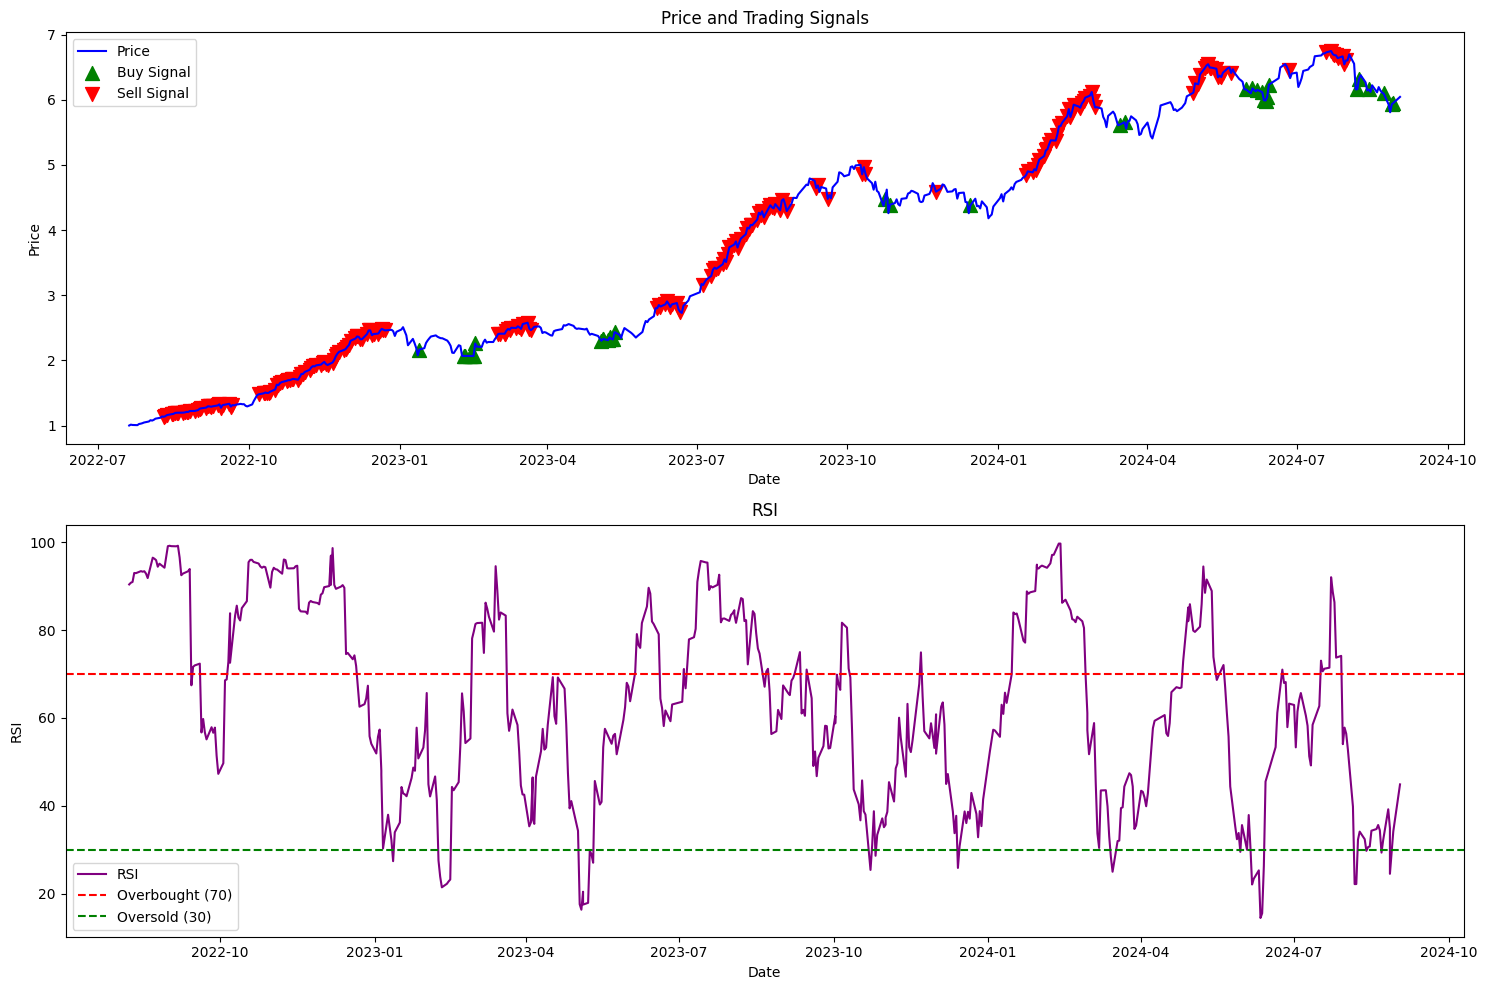

In [44]:
visualize_rsi_strategy(result)

In [53]:
result

,date,code,title,price,market_cap,number_of_investors,number_of_shares,year,month,day_of_week,daily_return,RSI,Buy_Signal,Sell_Signal
0,2022-07-20,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,1.000000,2.024321e+07,863.0,20243210.0,2022,7,3,NaN,NaN,0.0,0.0
1,2022-07-21,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,1.013112,2.050863e+07,1679.0,20243210.0,2022,7,4,0.013112,NaN,0.0,0.0
2,2022-07-22,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,1.008169,2.978604e+07,1982.0,29544692.0,2022,7,5,-0.004879,NaN,0.0,0.0
3,2022-07-25,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,1.005480,3.300152e+07,2122.0,32821665.0,2022,7,1,-0.002667,NaN,0.0,0.0
4,2022-07-26,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,1.023531,3.579884e+07,2211.0,34975832.0,2022,7,2,0.017953,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,2024-08-27,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,5.809673,2.505860e+09,34638.0,431325445.0,2024,8,2,-0.020760,34.937191,0.0,0.0
550,2024-08-27,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,5.809673,2.505860e+09,34638.0,431325445.0,2024,8,2,0.000000,24.509006,0.0,0.0
551,2024-08-28,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,5.932363,2.648821e+09,34485.0,446503593.0,2024,8,3,0.021118,29.427043,1.0,0.0
552,2024-08-29,HKH,HEDEF PORTFÖY KATILIM HİSSE SENEDİ (TL) FONU (...,5.953492,2.550287e+09,34374.0,428368235.0,2024,8,4,0.003562,34.174741,1.0,0.0


In [51]:
def calculate_profit(result):
    # Alış ve satış sinyallerini bulalım
    buy_signals = result[result['Buy_Signal'] == 1]
    sell_signals = result[result['Sell_Signal'] == 1]

    # Eğer alış sayısı satış sayısından fazlaysa, son alışı çıkaralım
    if len(buy_signals) > len(sell_signals):
        buy_signals = buy_signals.iloc[:-1]

    # Toplam kâr/zararı hesaplayalım
    total_profit = 0
    transactions = []

    for buy, sell in zip(buy_signals.iterrows(), sell_signals.iterrows()):
        buy_price = buy[1]['price']
        sell_price = sell[1]['price']
        profit = sell_price - buy_price
        total_profit += profit

        transactions.append({
            'buy_date': buy[1]['date'],
            'buy_price': buy_price,
            'sell_date': sell[1]['date'],
            'sell_price': sell_price,
            'profit': profit
        })

    # Sonuçları bir DataFrame'e dönüştürelim
    transactions_df = pd.DataFrame(transactions)

    # İstatistikleri hesaplayalım
    total_transactions = len(transactions)
    profitable_trades = sum(transactions_df['profit'] > 0)
    loss_making_trades = sum(transactions_df['profit'] < 0)
    win_rate = profitable_trades / total_transactions if total_transactions > 0 else 0
    average_profit = transactions_df['profit'].mean() if total_transactions > 0 else 0
    
    print(f"Toplam İşlem Sayısı: {total_transactions}")
    print(f"Kârlı İşlem Sayısı: {profitable_trades}")
    print(f"Zararlı İşlem Sayısı: {loss_making_trades}")
    print(f"Kazanma Oranı: {win_rate:.2%}")
    print(f"Ortalama Kâr/Zarar: {average_profit:.2f}")
    print(f"Toplam Kâr/Zarar: {total_profit:.2f}")

    return transactions_df, total_profit

In [52]:
transactions_df, total_profit = calculate_profit(result)
print(transactions_df)

Toplam İşlem Sayısı: 34
Kârlı İşlem Sayısı: 0
Zararlı İşlem Sayısı: 34
Kazanma Oranı: 0.00%
Ortalama Kâr/Zarar: -2.95
Toplam Kâr/Zarar: -100.24
     buy_date  buy_price  sell_date  sell_price    profit
0  2023-01-13   2.166575 2022-08-10    1.133830 -1.032745
1  2023-02-09   2.068089 2022-08-11    1.142843 -0.925246
2  2023-02-10   2.067950 2022-08-12    1.159947 -0.908003
3  2023-02-13   2.067531 2022-08-15    1.175459 -0.892072
4  2023-02-14   2.067392 2022-08-16    1.179222 -0.888170
5  2023-02-15   2.067228 2022-08-17    1.192451 -0.874777
6  2023-02-16   2.259158 2022-08-18    1.195774 -1.063384
7  2023-05-04   2.301512 2022-08-19    1.196515 -1.104997
8  2023-05-05   2.329701 2022-08-22    1.197658 -1.132043
9  2023-05-05   2.329701 2022-08-23    1.201568 -1.128133
10 2023-05-08   2.309536 2022-08-24    1.209065 -1.100471
11 2023-05-09   2.353615 2022-08-25    1.208121 -1.145494
12 2023-05-10   2.330170 2022-08-26    1.222324 -1.107846
13 2023-05-11   2.321434 2022-08-29    1.223